# Regression Linéaire Polynomiale from scratch

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

## Generation du jeux de données

In [6]:
x = np.random.randn(200, 1)
y = np.sin(np.abs(x)) + np.random.randn(200, 1) / 8

In [8]:
x.shape

(200, 1)

In [10]:
y.shape

(200, 1)

## Definition du model

In [13]:
def model(X, theta):
    return X.dot(theta)

## Fonction Couts

In [16]:
def fonction_cout(X, theta, y, delta):
    y_pred = model(X, theta)
    absolute_error = np.abs(y - y_pred)
    erreurs = np.where(absolute_error <= delta,
                       0.5 * (absolute_error ** 2),
                       delta * absolute_error - 0.5 * delta)
    return erreurs.mean(axis=0)

## Le gradiant

In [19]:
def gradiant(X, theta, y, delta):
    errors = model(X, theta) - y
    absolute_errors = np.abs(errors)
    # Facteur de derivation
    factor = np.where(absolute_errors <= delta, errors, delta * np.sign(errors))
    m = len(y)
    return X.T.dot(factor) / m

In [21]:
def normaliser(X):
    moyenne = np.mean(X, axis=0)
    ecart_type = np.std(X, axis=0)
    ecart_type = np.where(ecart_type == 0, 1, ecart_type)
    return (X - moyenne) / ecart_type, moyenne, ecart_type

## La descente de gradiant

In [24]:
def gradiant_descent(X, theta, y, delta = 1, alpha=0.01, precision=0.001, nbr_iterations=1000): 
    historique_cout = []
    x_norme, moyenne, ecart_type = normaliser(X[:, : X.shape[1] - 1])
    x_norme = x_norme.reshape((X.shape[0], X.shape[1] - 1))
    moyenne = moyenne.reshape((X.shape[1] - 1, 1))
    ecart_type = ecart_type.reshape((X.shape[1] - 1, 1))                          
    x_norme = np.hstack((x_norme, np.ones((X.shape[0], 1))))
    for i in range(nbr_iterations): 
        historique_cout.append(fonction_cout(x_norme, theta, y, delta))
        theta_precedent = theta
        theta = theta - alpha * gradiant(x_norme, theta, y, delta)
        if 0 < precision < 1:
            theta_precedent = (theta_precedent - theta) ** 2
            distance = theta_precedent.sum(axis=0)[0]
            if distance <= precision:
                break
    theta[:-1, 0] = theta[:-1, 0] / ecart_type[:, 0]
    theta[-1, 0] = theta[-1, 0] - np.sum((moyenne[:, 0] / ecart_type[:, 0]) * theta[:-1, 0])
    return theta, historique_cout

In [26]:
def scores(y_pred, y): 
    mse = np.mean((y - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y - y_pred))
    r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y))**2)
    return {'r2': r2, 'mae': mae, 'rmse': rmse, 'mse': mse}

## Observation des données

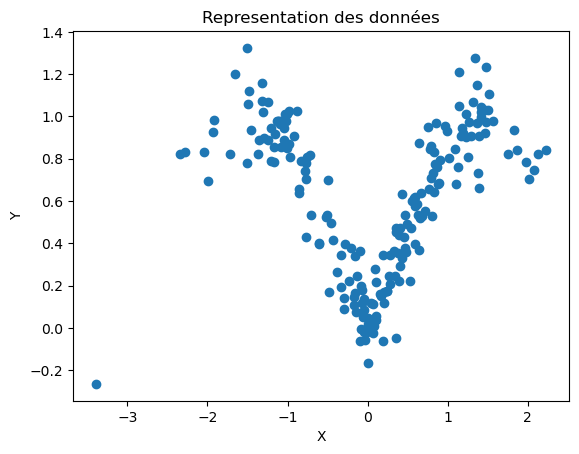

In [29]:
plt.figure() 
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Representation des données")
plt.show()

Vu les données on utilisera un polynome de degré 4 car les données semble coupés l'axe des x=0 au plus 4 fois et on a trois extreme locaux

## Preparation de X et theta

In [33]:
X = np.concatenate((x**4, x**3, x**2, x, np.ones((x.shape[0], 1))), axis=1)
X.shape

(200, 5)

In [35]:
np.median(X,axis=0) - X.mean(axis=0)

array([-2.54729441,  0.10215398, -0.42049602,  0.06115006,  0.        ])

In [37]:
theta = np.zeros((5, 1))
theta.shape

(5, 1)

## Répresation du modele avant l'apprentissage

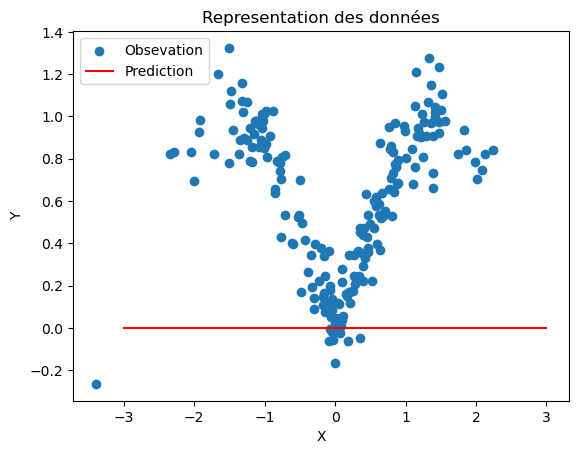

In [40]:
x_m = np.linspace(-3, 3, 100).reshape(-1, 1)
X_m = np.concatenate((x_m**4, x_m**3, x_m**2, x_m, np.ones((x_m.shape[0], 1))), axis=1)
y_pred = model(X_m, theta)
plt.figure() 
plt.scatter(x, y, label="Obsevation")
plt.plot(x_m, y_pred, c='r', label="Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Representation des données")
plt.legend()
plt.show()

## Apprentissage

In [43]:
theta, historique_cout = gradiant_descent(X, theta, y, delta= 0.25, alpha=0.05, precision=0, nbr_iterations= 3000)

In [45]:
theta

array([[-0.06807813],
       [-0.05588627],
       [ 0.50768392],
       [ 0.0838662 ],
       [ 0.24063602]])

## Répresentation du modele apres apprentissage

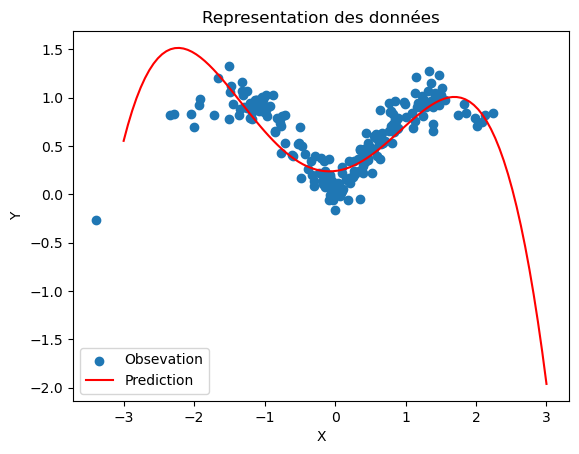

In [48]:
y_pred = model(X_m, theta)
plt.figure() 
plt.scatter(x, y, label="Obsevation")
plt.plot(x_m, y_pred, c='r', label="Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Representation des données")
plt.legend()
plt.show()

In [50]:
performances = scores(model(X, theta), y)
for k, v in performances.items():
    if(k == 'r2'):
        print(f"{k} = {v * 100: .2f} %")
    else:
        print(f"{k} = {v: .2f}")

r2 =  62.76 %
mae =  0.17
rmse =  0.22
mse =  0.05
